## About dataset
- ID     : for each pokemon
- Name   : Name of each pokemon
- Type 1 : Each pokemon has a type, this determines weakness/resistance to attacks
- Type 2 : Some pokemon are dual type and have 2
- Total  : sum of all stats that come after this, a general guide to how strong a pokemon is
- HP     : hit points, or health, defines how much damage a pokemon can withstand before fainting
- Attack : the base modifier for normal attacks (eg. Scratch, Punch)
- Defense: the base damage resistance against normal attacks
- SP Atk : special attack, the base modifier for special attacks (e.g. fire blast, bubble beam)
- SP Def : the base damage resistance against special attacks
- Speed  : determines which pokemon attacks first each round

In [1]:
# import library
import pandas as pd # for manipulate
import matplotlib as plt # for standart plot
import seaborn as sns # colorfull plot 
import numpy as np

from plotly import tools
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

In [3]:
#Importing Data
df = pd.read_csv("data_input/pokemon.csv",index_col=0) 
df # Read Data

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [4]:
# rename coloumns
df.columns = [ 'name', 'tipe1', 'tipe2', 'total', 'hp', 'att', 'def', 'satk', 'sdef', 'speed', 'generation', 'legendary']
df

,name,tipe1,tipe2,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [5]:
#shape melihat banyak baris dan kolom
df.shape

(800, 12)

In [6]:
# cek tipe data dengan method info()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        800 non-null    object
 1   tipe1       800 non-null    object
 2   tipe2       414 non-null    object
 3   total       800 non-null    int64 
 4   hp          800 non-null    int64 
 5   att         800 non-null    int64 
 6   def         800 non-null    int64 
 7   satk        800 non-null    int64 
 8   sdef        800 non-null    int64 
 9   speed       800 non-null    int64 
 10  generation  800 non-null    int64 
 11  legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


name            0
tipe1           0
tipe2         386
total           0
hp              0
att             0
def             0
satk            0
sdef            0
speed           0
generation      0
legendary       0
dtype: int64
name           0.00
tipe1          0.00
tipe2         48.25
total          0.00
hp             0.00
att            0.00
def            0.00
satk           0.00
sdef           0.00
speed          0.00
generation     0.00
legendary      0.00
dtype: float64


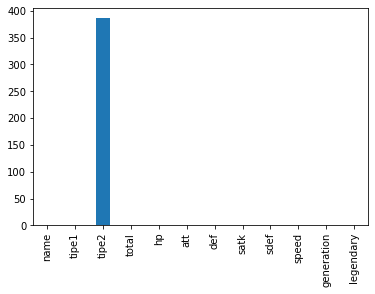

In [8]:
#Check Missing Value and Finding the missing percentage
import matplotlib.pyplot as plt
df.isna().sum().plot(kind="bar");
missing_values_sum = df.isna().sum()
print(missing_values_sum)
missing_values_percent = df.isna().mean()*100
print(missing_values_percent)

terdapat missing value pada kolom tipe2 dimana missing value tersebut berjumlah 48% dari jumlah keseluruhan data, karna terdapat 2 kolom tipe maka disini saya memakai hanya kolom tipe 1 saja dan akan drop kolom tipe2 yang terdapat nyaris dari setengah missing value dari total keseluruhan data.

<AxesSubplot:>

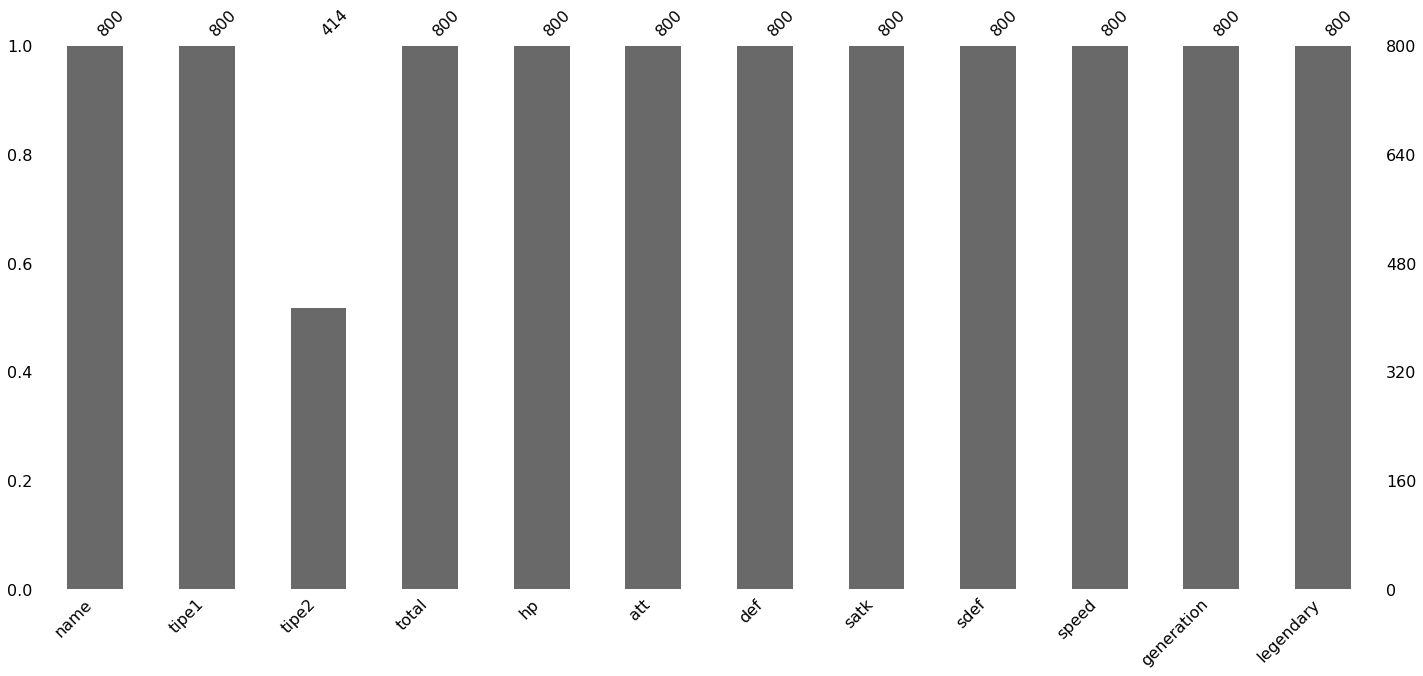

In [9]:
import missingno as msno
msno.bar(df)

In [36]:
# drop kolom tipe 2 untuk handle missing value
df = df.drop(columns = ['tipe2'])
df

,name,tipe1,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,
1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True


sampai sini data yang dipakai hanya berjumlah 12 kolom

# Exploratory Data Analysis


In [34]:
# top 10 hp
v1 = df[["name","hp"]].sort_values(by= "hp",ascending= False).head(10)
v1

,name,hp
#,,
242,Blissey,255
113,Chansey,250
202,Wobbuffet,190
321,Wailord,170
594,Alomomola,165
143,Snorlax,160
426,Drifblim,150
289,Slaking,150
487,GiratinaAltered Forme,150


In [37]:
df.sort_values(['hp'], ascending=False).head(10)

,name,tipe1,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,
242,Blissey,Normal,540,255,10,10,75,135,55,2,False
113,Chansey,Normal,450,250,5,5,35,105,50,1,False
202,Wobbuffet,Psychic,405,190,33,58,33,58,33,2,False
321,Wailord,Water,500,170,90,45,90,45,60,3,False
594,Alomomola,Water,470,165,75,80,40,45,65,5,False
143,Snorlax,Normal,540,160,110,65,65,110,30,1,False
426,Drifblim,Ghost,498,150,80,44,90,54,80,4,False
289,Slaking,Normal,670,150,160,100,95,65,100,3,False
487,GiratinaAltered Forme,Ghost,680,150,100,120,100,120,90,4,True


<AxesSubplot:title={'center':'top 10 hp'}, ylabel='name'>

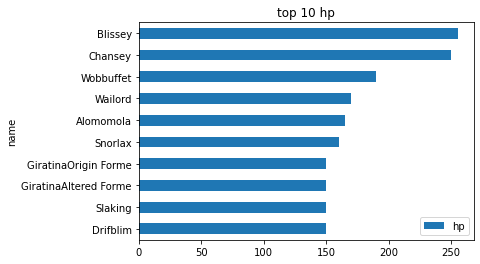

In [12]:
v1.sort_values(by= "hp",ascending= True).plot(kind='barh', x='name', y='hp',
                  title='top 10 hp')

In [13]:
# melihat distribusi dari kolom hp
fig = ff.create_distplot([df.hp],['hp'],bin_size=5)
iplot(fig, filename='Basic Distplot')

In [14]:
# top 10 attack
v2 = df[["name","att"]].sort_values(by= "att",ascending= False).head(10)
v2

,name,att
#,,
150,MewtwoMega Mewtwo X,190
214,HeracrossMega Heracross,185
383,GroudonPrimal Groudon,180
384,RayquazaMega Rayquaza,180
386,DeoxysAttack Forme,180
646,KyuremBlack Kyurem,170
445,GarchompMega Garchomp,170
475,GalladeMega Gallade,165
354,BanetteMega Banette,165


In [28]:
df.sort_values(['att'], ascending=False).head(10)

,name,tipe1,tipe2,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,,
150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
214,HeracrossMega Heracross,Bug,Fighting,600,80,185,115,40,105,75,2,False
383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True
384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
646,KyuremBlack Kyurem,Dragon,Ice,700,125,170,100,120,90,95,5,True
445,GarchompMega Garchomp,Dragon,Ground,700,108,170,115,120,95,92,4,False
475,GalladeMega Gallade,Psychic,Fighting,618,68,165,95,65,115,110,4,False
354,BanetteMega Banette,Ghost,NaN,555,64,165,75,93,83,75,3,False


<AxesSubplot:title={'center':'top 10 attack'}, ylabel='name'>

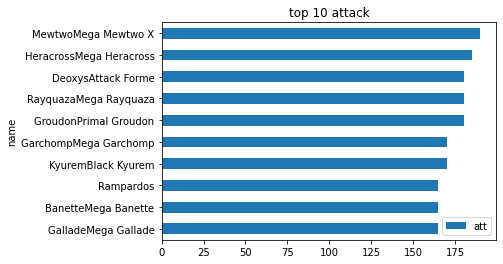

In [15]:
v2.sort_values(by= "att",ascending= True).plot(kind='barh', x='name', y='att',
                  title='top 10 attack')

In [17]:
# top 10 defense
v3 = df[["name","def"]].sort_values(by= "def",ascending= False).head(10)
v3

,name,def
#,,
213,Shuckle,230
208,SteelixMega Steelix,230
306,AggronMega Aggron,230
208,Steelix,200
377,Regirock,200
713,Avalugg,184
91,Cloyster,180
80,SlowbroMega Slowbro,180
306,Aggron,180


In [38]:
df.sort_values(['def'], ascending=False).head(10)

,name,tipe1,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,
213,Shuckle,Bug,505,20,10,230,10,230,5,2,False
208,SteelixMega Steelix,Steel,610,75,125,230,55,95,30,2,False
306,AggronMega Aggron,Steel,630,70,140,230,60,80,50,3,False
208,Steelix,Steel,510,75,85,200,55,65,30,2,False
377,Regirock,Rock,580,80,100,200,50,100,50,3,True
713,Avalugg,Ice,514,95,117,184,44,46,28,6,False
91,Cloyster,Water,525,50,95,180,85,45,70,1,False
80,SlowbroMega Slowbro,Water,590,95,75,180,130,80,30,1,False
306,Aggron,Steel,530,70,110,180,60,60,50,3,False


<AxesSubplot:title={'center':'top 10 defense'}, ylabel='name'>

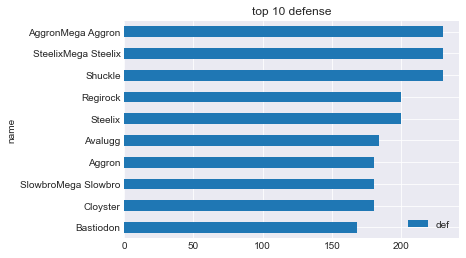

In [135]:
v3.sort_values(by= "def",ascending= True).plot(kind='barh', x='name', y='def',
                  title='top 10 defense')

In [16]:
# lihat distribusi antar dua variable(attack & defense)
hist_data = [df['att'],df['def']]
group_labels = ['att','def']

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Distplot of attack and defense')

In [18]:
#Top 10 fastest pokemons
v4 = df[["name","speed"]].sort_values(by= "speed",ascending= False).head(10)
v4

,name,speed
#,,
386,DeoxysSpeed Forme,180
291,Ninjask,160
386,DeoxysNormal Forme,150
142,AerodactylMega Aerodactyl,150
65,AlakazamMega Alakazam,150
386,DeoxysAttack Forme,150
15,BeedrillMega Beedrill,145
254,SceptileMega Sceptile,145
617,Accelgor,145


<AxesSubplot:title={'center':'top 10 speed'}, ylabel='name'>

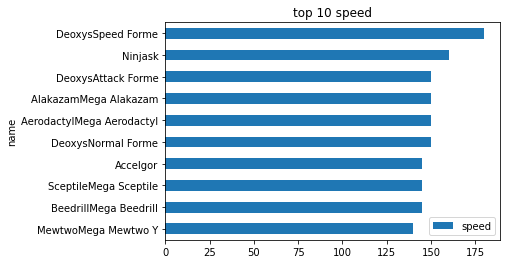

In [19]:
v4.sort_values(by= "speed",ascending= True).plot(kind='barh', x='name', y='speed',
                  title='top 10 speed')

In [51]:
# top 10 by total
v5 = df[["name","total"]].sort_values(by= "total",ascending= False).head(10)
v5

,name,total
#,,
384,RayquazaMega Rayquaza,780
150,MewtwoMega Mewtwo Y,780
150,MewtwoMega Mewtwo X,780
382,KyogrePrimal Kyogre,770
383,GroudonPrimal Groudon,770
493,Arceus,720
646,KyuremWhite Kyurem,700
646,KyuremBlack Kyurem,700
373,SalamenceMega Salamence,700


In [52]:
df.sort_values(['total'], ascending=False).head(10)

,name,tipe1,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,
384,RayquazaMega Rayquaza,Dragon,780,105,180,100,180,100,115,3,True
150,MewtwoMega Mewtwo Y,Psychic,780,106,150,70,194,120,140,1,True
150,MewtwoMega Mewtwo X,Psychic,780,106,190,100,154,100,130,1,True
382,KyogrePrimal Kyogre,Water,770,100,150,90,180,160,90,3,True
383,GroudonPrimal Groudon,Ground,770,100,180,160,150,90,90,3,True
493,Arceus,Normal,720,120,120,120,120,120,120,4,True
646,KyuremWhite Kyurem,Dragon,700,125,120,90,170,100,95,5,True
646,KyuremBlack Kyurem,Dragon,700,125,170,100,120,90,95,5,True
373,SalamenceMega Salamence,Dragon,700,95,145,130,120,90,120,3,False


<AxesSubplot:title={'center':'top 10 total power'}, ylabel='name'>

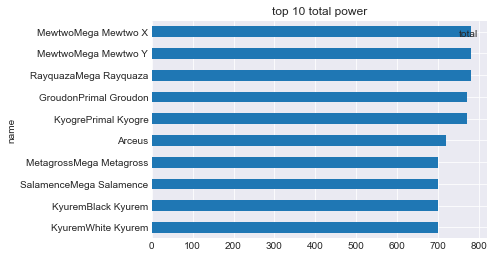

In [54]:
v5.sort_values(by= "total",ascending= True).plot(kind='barh', x='name', y='total',
                  title='top 10 total power')

In [50]:
# melihat distribusi dari banyak variable
hist_data = [df['hp'],df['att'],df['def'],df['satk'],df['sdef'],df['speed']] # pilih kolom
group_labels = list(df.iloc[:,5:11].columns) # ambil kolom 5 sampai 11

fig = ff.create_distplot(hist_data, group_labels, bin_size=5)
iplot(fig, filename='Distplot of all pokemon stats')

C:\Users\ASUS\anaconda3\envs\projectx\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



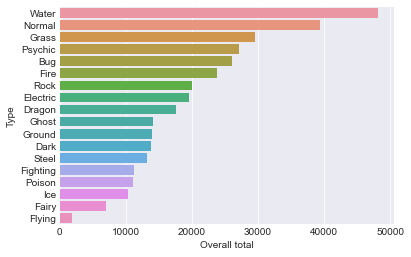

In [21]:
#Most powerfull type 1 pokemon types
plt.style.use('seaborn-darkgrid')
x= df.groupby("tipe1").total.sum().sort_values(ascending= False)
fig= sns.barplot(x.values,x.index)
fig.set_xlabel("Overall total")
fig.set_ylabel("Type");

In [43]:
# visualisasi menggunakan spyder chart
x = df[df["name"] == "Sunkern"]
data = [go.Scatterpolar(
  r = [x['hp'].values[0],x['att'].values[0],x['def'].values[0],x['satk'].values[0],x['sdef'].values[0],x['speed'].values[0],x["hp"].values[0]],
  theta = ['hp','att','def','satk','sdef','speed','hp'],
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 250]
    )
  ),
  showlegend = False,
  title = "Stats of {}".format(x.name.values[0])
)
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "Single Pokemon stats")

In [66]:
df

,name,tipe1,tipe2,total,hp,att,def,satk,sdef,speed,generation,legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


In [23]:
def compare2pokemon(x,y):
    x = df[df["name"] == x]
    y = df[df["name"] == y]

    trace0 = go.Scatterpolar(
      r = [x['hp'].values[0],x['att'].values[0],x['def'].values[0],x['satk'].values[0],x['sdef'].values[0],x['speed'].values[0],x["hp"].values[0]],
      theta = ['hp','att','def','satk','sdef','speed','hp'],
      fill = 'toself',
      name = x.name.values[0]
    )

    trace1 = go.Scatterpolar(
      r = [y['hp'].values[0],y['att'].values[0],y['def'].values[0],y['satk'].values[0],y['sdef'].values[0],y['speed'].values[0],y["hp"].values[0]],
      theta = ['hp','att','def','satk','sdef','speed','hp'],
      fill = 'toself',
      name = y.name.values[0]
    )

    data = [trace0, trace1]

    layout = go.Layout(
      polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 250]
        )
      ),
      showlegend = True,
      title = "{} vs {}".format(x.name.values[0],y.name.values[0])
    )
    fig = go.Figure(data=data, layout=layout)
    iplot(fig, filename = "Two Pokemon stats")

In [42]:
# Comparing Groudon and Kyogre
compare2pokemon("RayquazaMega Rayquaza","MewtwoMega Mewtwo X")

## Conclusion
- Pokemon Tipe Air adalah yang terkuat dan tercepat di antara semua tipe -Pokemon tipe Air juga memiliki pertahanan tertinggi, RayquazaMega Rayquaza, MewtwoMega Mewtwo X memiliki statistik keseluruhan terbaik dan dianggap yang terkuat sementara Sunkern dapat dianggap paling tidak kuat menurut statistik total, DeoxysSpeed Forme adalah pokemon tercepat, MewtwoMega Mewtwo X memiliki serangan terbaik, Pokemon tipe air memiliki jumlah pokemon terbanyak di tipe 1.